# 라이브러리 및 데이터 import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#한글 깨짐 해결 방법
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# **데이터 IMPORT**

In [ ]:
#국민건강보험공단_환경성질환_의료이용정보
R_data = pd.read_excel('/content/drive/MyDrive/Data/Rhinitis_data.xlsx') #비염 데이터
As_data = pd.read_excel('/content/drive/MyDrive/Data/Asthma_data.xlsx')  #천식 데이터
At_data = pd.read_excel('/content/drive/MyDrive/Data/Atopy_data.xlsx')   #아토피 데이터

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#각 연령군별 전체 인구수(2013 ~ 2022)
dt_2013 = pd.read_excel('/content/drive/MyDrive/Data/2013_연령별인구현황_연간.xlsx')
dt_2014 = pd.read_excel('/content/drive/MyDrive/Data/2014_연령별인구현황_연간.xlsx')
dt_2015 = pd.read_excel('/content/drive/MyDrive/Data/2015_연령별인구현황_연간.xlsx')
dt_2016 = pd.read_excel('/content/drive/MyDrive/Data/2016_연령별인구현황_연간.xlsx')
dt_2017 = pd.read_excel('/content/drive/MyDrive/Data/2017_연령별인구현황_연간.xlsx')
dt_2018 = pd.read_excel('/content/drive/MyDrive/Data/2018_연령별인구현황_연간.xlsx')
dt_2019 = pd.read_excel('/content/drive/MyDrive/Data/2019_연령별인구현황_연간.xlsx')
dt_2020 = pd.read_excel('/content/drive/MyDrive/Data/2020_연령별인구현황_연간.xlsx')
dt_2021 = pd.read_excel('/content/drive/MyDrive/Data/2021_연령별인구현황_연간.xlsx')
dt_2022 = pd.read_excel('/content/drive/MyDrive/Data/2022_연령별인구현황_연간.xlsx')

In [ ]:
dt_2013.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
0,0,전국,"51,141,463","51,141,463","421,465","486,655","474,098","472,047","447,055","467,935",...,"31,165","21,718","16,107","11,883","8,387","6,906","4,946","3,580","2,838","13,793"
1,1100000000,서울특별시,"10,143,645","10,143,645","78,576","88,271","82,972","82,113","76,825","80,786",...,"5,416","3,932","3,075","2,235","1,606","1,398","1,103",810,697,"4,266"
2,2600000000,부산광역시,"3,527,635","3,527,635","24,825","28,646","27,636","27,190","24,907","26,261",...,"1,742","1,212",870,611,452,358,270,195,205,"1,299"
3,2700000000,대구광역시,"2,501,588","2,501,588","18,708","21,647","21,177","21,018","19,963","21,215",...,"1,135",809,592,411,291,241,161,114,99,460
4,2800000000,인천광역시,"2,879,782","2,879,782","24,908","28,749","28,279","27,879","26,438","27,277",...,"1,389","1,051",770,577,387,351,220,158,117,575


In [ ]:
def slicing(data, year):

    # 연령대별 합계 계산
    class0 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(0, 6))
    class1 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(6, 12))
    class2 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(12, 18))
    class3 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(18, 45))
    class4 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(45, 65))
    class5 = sum(float(data[str(i) + "세"][0].replace(',', '')) for i in range(65, 100))

    # 새로운 데이터프레임 생성
    dt = {
        '년도': [year] * 6,
        '연령군': [0, 1, 2, 3, 4, 5],
        '인구 수': [class0, class1, class2, class3, class4, class5]  # 계산된 수치
    }

    sdata = pd.DataFrame(dt)

    return sdata

In [ ]:
#연도별 연령군 데이터 슬라이싱
aft_2013 = slicing(dt_2013, 2013)
aft_2014 = slicing(dt_2014, 2014)
aft_2015 = slicing(dt_2015, 2015)
aft_2016 = slicing(dt_2016, 2016)
aft_2017 = slicing(dt_2017, 2017)
aft_2018 = slicing(dt_2018, 2018)
aft_2019 = slicing(dt_2019, 2019)
aft_2020 = slicing(dt_2020, 2020)
aft_2021 = slicing(dt_2021, 2021)
aft_2022 = slicing(dt_2022, 2022)

# 합치기
frames = [aft_2013, aft_2014, aft_2015, aft_2016, aft_2017, aft_2018, aft_2019, aft_2020, aft_2021, aft_2022]
y_age_df = pd.concat(frames)

# **우리나라 인구 수의 연도별 연령대별 분포**

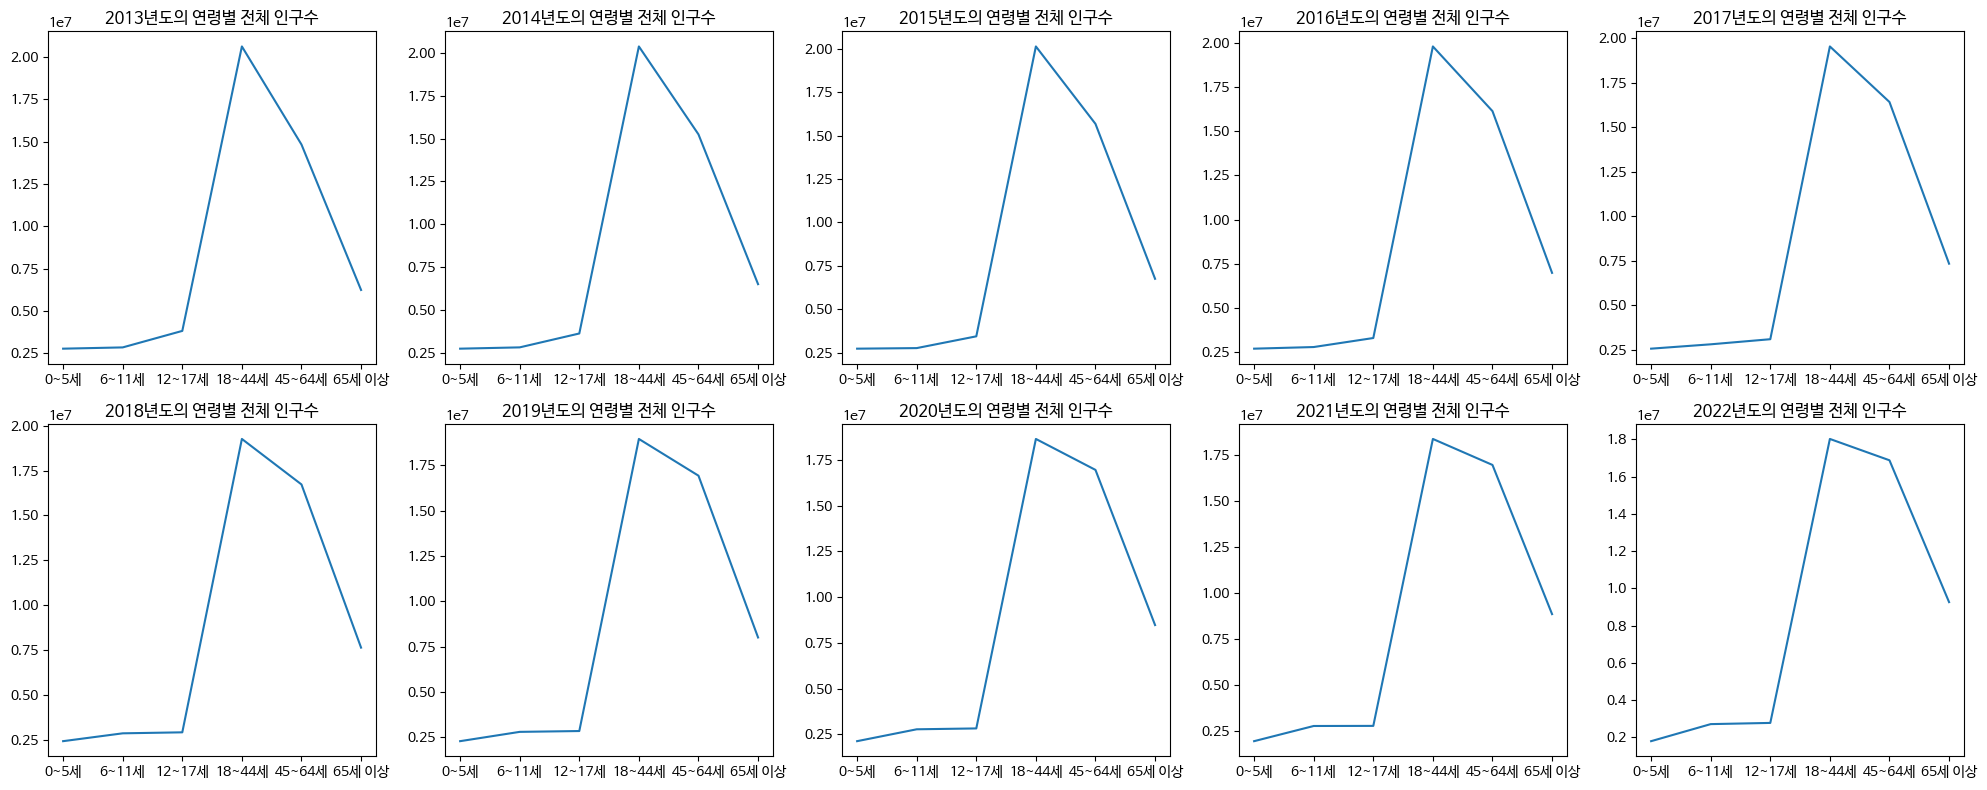

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# 사용자 정의 x축 레이블
x_labels = ['0~5세', '6~11세', '12~17세', '18~44세', '45~64세','65세 이상']

for i, year in enumerate(range(2013, 2023)):
  row = i // 5
  col = i % 5
  ax = axs[row, col]

  ax.plot(y_age_df[y_age_df['년도'] == year]['연령군'],y_age_df[y_age_df['년도'] == year]['인구 수'])
  ax.set_title(f'{year}년도의 연령별 전체 인구수')

  # 각 서브플롯의 x축에 사용자 정의 레이블 설정
  ax.set_xticks(range(len(x_labels)))
  ax.set_xticklabels(x_labels)

plt.tight_layout()  # 서브플롯 간격 조정
plt.show()

# 전처리

- Column명 통일하기   
  - STD_YYYYMM : 요양개시년월   
  - SIDO : 주소(시도)   
  - SGG : 주소(시군구)   
  - GEN : 성별(1 : 남자, 2 : 여자)   
  - AGG : 연령군(0 : 0-5세, 1 : 6-11세, 2 : 12-17세, 3 : 18-44세, 4 : 45-64세, 5 : ≥65세)   
  - CNT : 외래 및 입원 주

In [ ]:
#열이름 바꾸기 실행
R_data = R_data.rename(columns={'STD_YYYYMM' : '요양개시연월','SIDO' : '주소(시도)', 'SGG' : '주소(시군구)' , 'GEN' : '성별', 'AGG' : '연령군', 'CNT' : '진료에피소드 건수' })
At_data = At_data.rename(columns={'STD_YYYYMM' : '요양개시연월','SIDO' : '주소(시도)', 'SGG' : '주소(시군구)' ,'GEN' : '성별', 'AGG' : '연령군', 'CNT' : '진료에피소드 건수' })
At_data.tail()

,요양개시연월,주소(시도),주소(시군구),성별,연령군,진료에피소드 건수
605833,202212,50,50130,2,1,18
605834,202212,50,50130,2,2,9
605835,202212,50,50130,2,3,49
605836,202212,50,50130,2,4,29
605837,202212,50,50130,2,5,31


- 2013년 이후의 데이터만 남기기

In [ ]:
def drop_bf_2013(data):

  # DataFrame의 복사본 생성
  sdata = data.copy()

  # 연월 컬럼에서 연도만 추출하여 숫자로 변환
  sdata['요양개시연월'] = sdata['요양개시연월'].astype(str)
  sdata['연도'] = sdata['요양개시연월'].str[:4].astype(int)

  # 2013년 이전 데이터 필터링
  sdata = sdata[sdata['연도'] >= 2013]

  return sdata

In [ ]:
R_data = drop_bf_2013(R_data)   # 2013년 이후의 비염 데이터
At_data = drop_bf_2013(At_data)  # 2013년 이후의 아토피 데이터
As_data = drop_bf_2013(As_data)  # 2013년 이후의 천식 데이터

In [ ]:
R_data[R_data['연도'] == 2013]['연령군']

251997    0
251998    1
251999    2
252000    3
252001    4
         ..
287991    1
287992    2
287993    3
287994    4
287995    5
Name: 연령군, Length: 35999, dtype: int64

- 연도별, 연령별 -> **진료 에피소드 건수 / 전체 인구수**   
     ex. 2013년에, 연령군이 0에 속하는 사람은 199명(199건)   
     2013년, 연령군이 0에 속하는 인구는 2769255명   
     => 199/2769255 ~ 0.00007186048   
        
- 100,000명 당 감염자 수로 변환하면, 7.2명

In [ ]:
# 두 데이터프레임을 '연도'와 '연령군'을 기준으로 병합합니다.
merged_df_R = pd.merge(R_data, y_age_df, left_on=['연도', '연령군'], right_on=['년도', '연령군'])
merged_df_As = pd.merge(As_data, y_age_df, left_on=['연도', '연령군'], right_on=['년도', '연령군'])
merged_df_At = pd.merge(At_data, y_age_df, left_on=['연도', '연령군'], right_on=['년도', '연령군'])

# '진료에피소드 건수'를 '인구 수'로 나누어 '감염 비율'을 계산합니다.
merged_df_R['10만명 당 감염 비율'] = 100000 * merged_df_R['진료에피소드 건수'] / merged_df_R['인구 수']
merged_df_As['10만명 당 감염 비율'] = 100000 * merged_df_As['진료에피소드 건수'] / merged_df_As['인구 수']
merged_df_At['10만명 당 감염 비율'] = 100000 * merged_df_At['진료에피소드 건수'] / merged_df_At['인구 수']

# 결과 확인
print(merged_df_R['10만명 당 감염 비율'])
print(merged_df_As['10만명 당 감염 비율'])
print(merged_df_At['10만명 당 감염 비율'])

0          7.186048
1          7.872153
2          6.066614
3          5.849949
4         10.869349
            ...    
359945     2.591917
359946    15.097915
359947    19.417776
359948     6.609387
359949     8.099740
Name: 10만명 당 감염 비율, Length: 359950, dtype: float64
0         1.913872
1         1.986094
2         3.936077
3         3.322193
4         4.333295
            ...   
353778    0.539983
353779    1.382356
353780    2.051934
353781    0.647979
353782    0.745176
Name: 10만명 당 감염 비율, Length: 353783, dtype: float64
0         1.769429
1         1.733318
2         2.383312
3         2.058315
4         3.286082
            ...   
356773    0.248392
356774    0.874772
356775    0.777575
356776    0.367188
356777    0.334789
Name: 10만명 당 감염 비율, Length: 356778, dtype: float64


# EDA

In [ ]:
# Convert 'Year-Month' to datetime
merged_df_R['Year-Month'] = pd.to_datetime(merged_df_R['요양개시연월'], format='%Y%m')
merged_df_As['Year-Month'] = pd.to_datetime(merged_df_As['요양개시연월'], format='%Y%m')
merged_df_At['Year-Month'] = pd.to_datetime(merged_df_At['요양개시연월'], format='%Y%m')

In [ ]:
print("비염");
merged_df_R = merged_df_R.drop('년도', axis=1)
merged_df_R.head(3)

비염


,요양개시연월,주소(시도),주소(시군구),성별,연령군,진료에피소드 건수,연도,인구 수,10만명 당 감염 비율,Year-Month
0,201301,11,11110,1,0,199,2013,2769255.0,7.186048,2013-01-01
1,201301,11,11110,2,0,218,2013,2769255.0,7.872153,2013-01-01
2,201301,11,11140,1,0,168,2013,2769255.0,6.066614,2013-01-01


In [ ]:
print("천식");
merged_df_As = merged_df_As.drop('년도', axis=1)
merged_df_As.head(3)

천식


,요양개시연월,주소(시도),주소(시군구),성별,연령군,진료에피소드 건수,연도,인구 수,10만명 당 감염 비율,Year-Month
0,201301,11,11110,1,0,53,2013,2769255.0,1.913872,2013-01-01
1,201301,11,11110,2,0,55,2013,2769255.0,1.986094,2013-01-01
2,201301,11,11140,1,0,109,2013,2769255.0,3.936077,2013-01-01


In [ ]:
print("아토피");
merged_df_At = merged_df_At.drop('년도', axis=1)
merged_df_At.head(3)

아토피


,요양개시연월,주소(시도),주소(시군구),성별,연령군,진료에피소드 건수,연도,인구 수,10만명 당 감염 비율,Year-Month
0,201301,11,11110,1,0,49,2013,2769255.0,1.769429,2013-01-01
1,201301,11,11110,2,0,48,2013,2769255.0,1.733318,2013-01-01
2,201301,11,11140,1,0,66,2013,2769255.0,2.383312,2013-01-01


# **비염 데이터의 연도별, 연령별 분포 그래프**

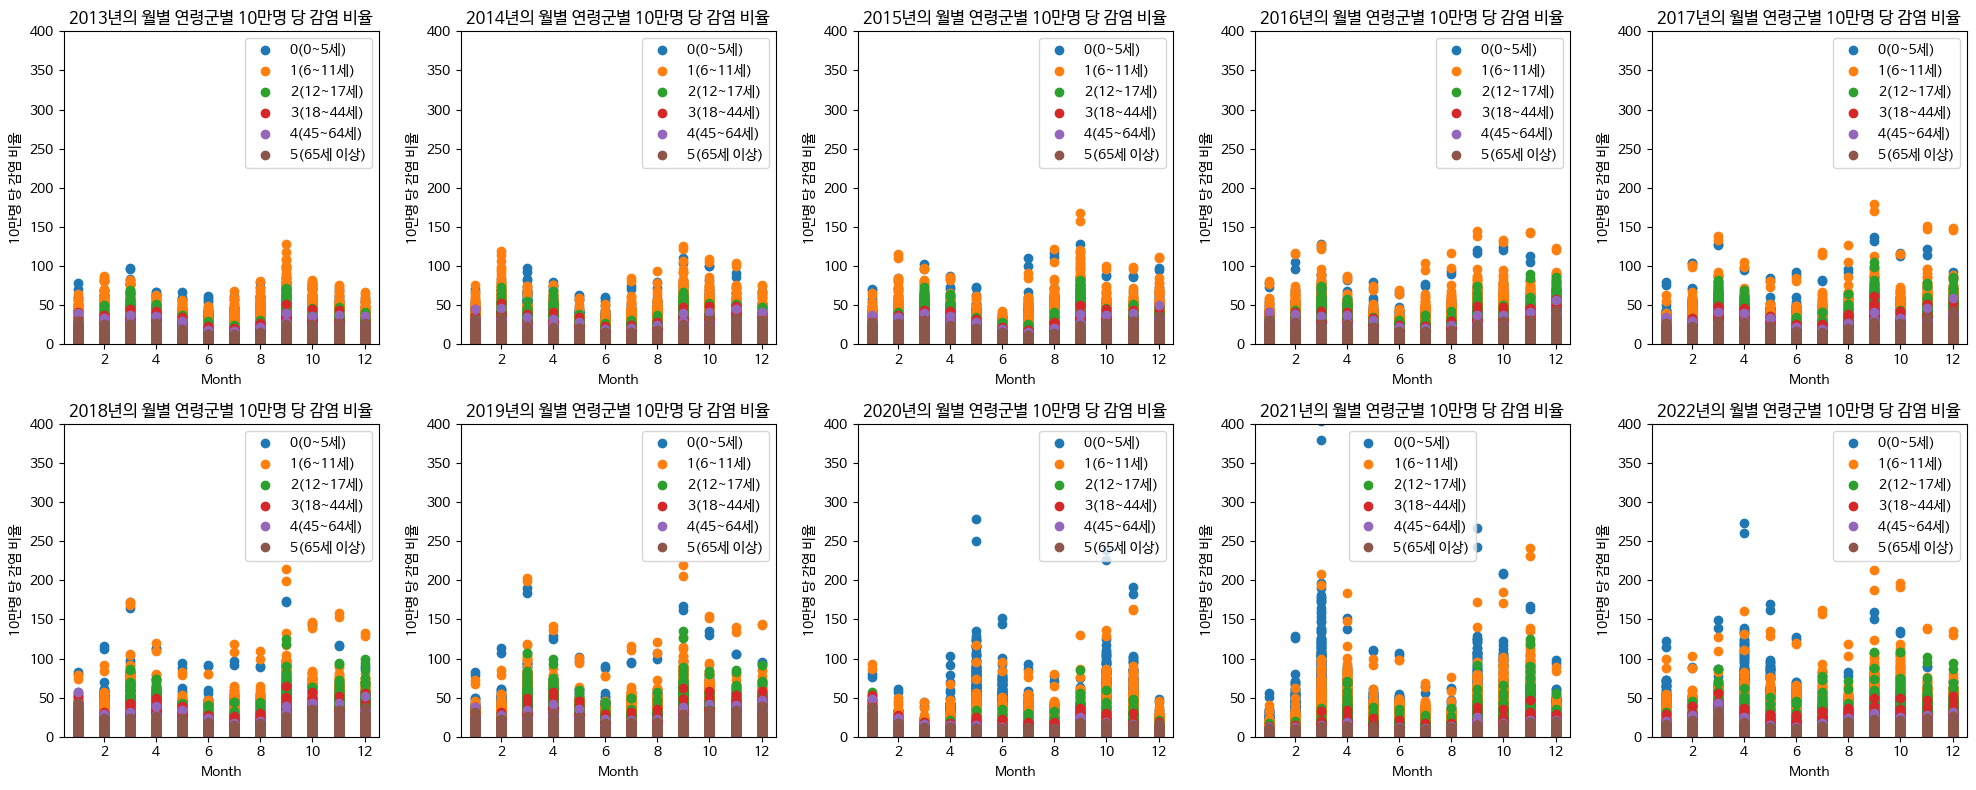

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, year in enumerate(range(2013, 2023)):
  row = i // 5
  col = i % 5
  ax = axs[row, col]

  year_data_r = merged_df_R[merged_df_R['연도'] == year]

  # 연령군을 카테고리 데이터로 변환하고, 각 카테고리에 고유한 숫자 할당
  year_data_r['연령군'] = pd.Categorical(year_data_r['연령군'])

  # 연령군별로 데이터를 그룹화하고 각 그룹에 대해 scatter 플롯 생성
  for age_group in year_data_r['연령군'].cat.categories:
    group_data = year_data_r[year_data_r['연령군'] == age_group]

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    ax.scatter(group_data['Year-Month'].dt.month, group_data['10만명 당 감염 비율'], label=label_str)

  ax.legend()
  ax.set_xlabel('Month')
  ax.set_ylabel('10만명 당 감염 비율')
  ax.set_title(f'{year}년의 월별 연령군별 10만명 당 감염 비율')
  # y축 범위 설정
  ax.set_ylim(0, 400)


plt.tight_layout()
plt.show()

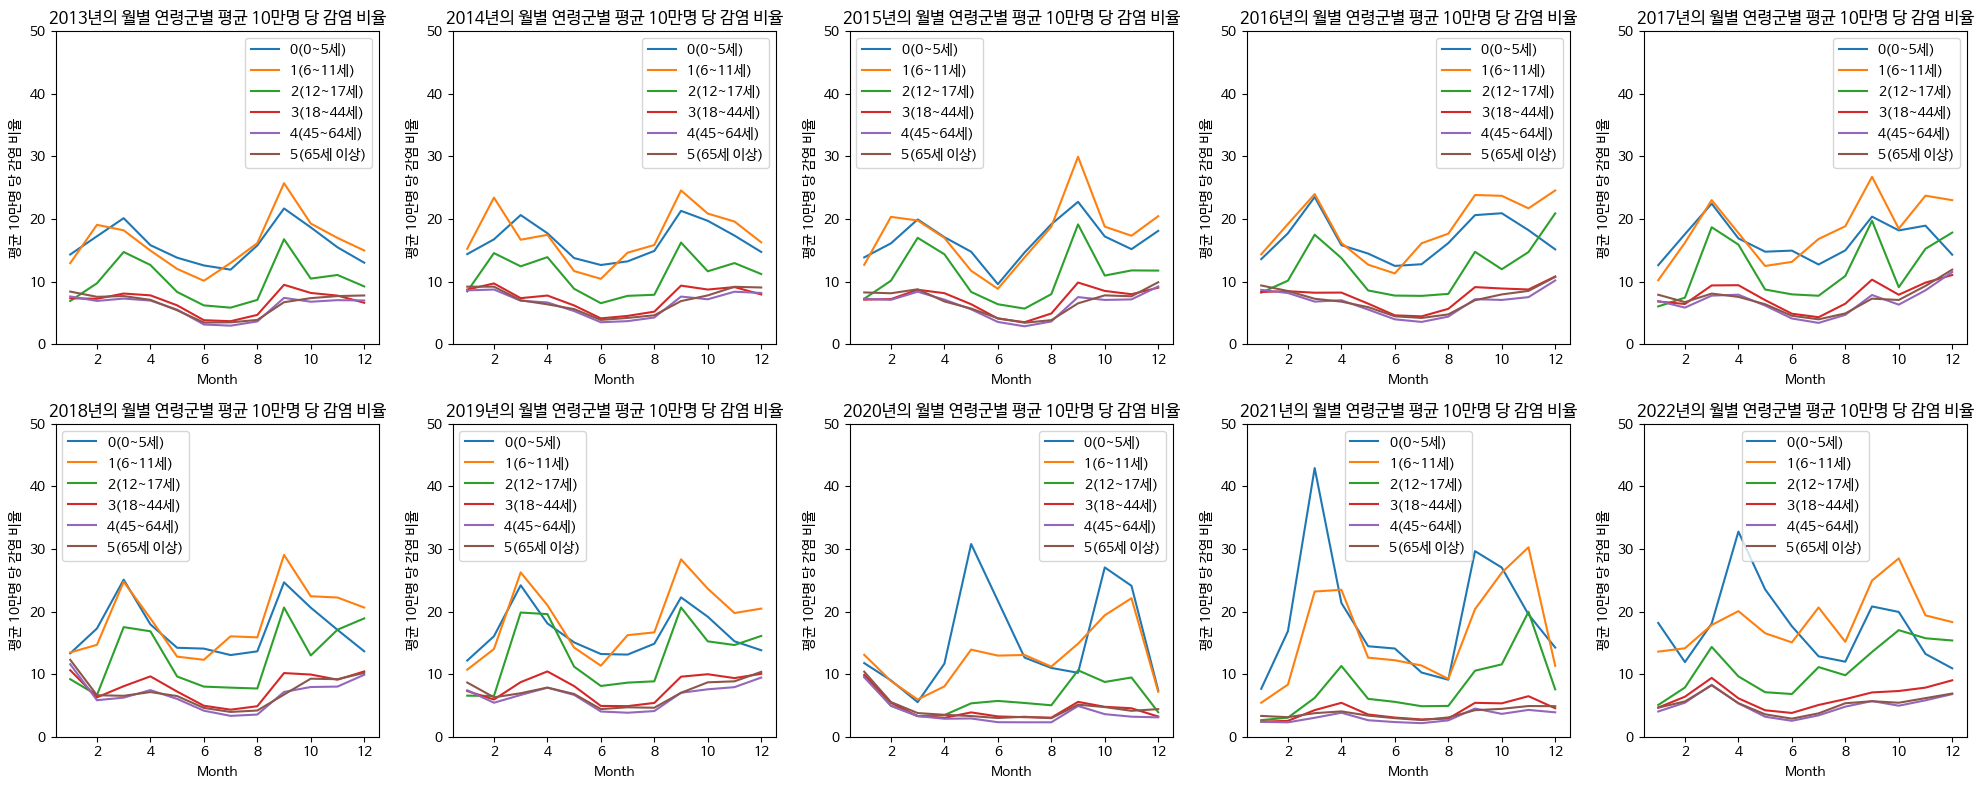

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
# 연령군에 대한 설명을 담은 사전
age_group_dict = {
    0: '0~5세',
    1: '6~11세',
    2: '12~17세',
    3: '18~44세',
    4: '45~64세',
    5: '65세 이상'
}

for i, year in enumerate(range(2013, 2023)):
    row = i // 5
    col = i % 5
    ax = axs[row, col]

    year_data_r = merged_df_R[merged_df_R['연도'] == year]

    # 연령군을 카테고리 데이터로 변환
    year_data_r['연령군'] = pd.Categorical(year_data_r['연령군'])

    # 연도, 월, 연령군별로 그룹화하여 평균 계산
    avg_infection_rate = year_data_r.groupby([year_data_r['Year-Month'].dt.month, '연령군'])['10만명 당 감염 비율'].mean()

    for age_group in year_data_r['연령군'].cat.categories:
        # 연령군별 데이터 추출
        group_data = avg_infection_rate[:, age_group]

        # 레이블 설정
        label_str = f'{age_group}({age_group_dict[age_group]})'  # age_group_dict는 연령군에 대한 설명을 담은 사전

        ax.plot(group_data.index, group_data.values, label=label_str)

    ax.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('평균 10만명 당 감염 비율')
    ax.set_title(f'{year}년의 월별 연령군별 평균 10만명 당 감염 비율')
    # y축 범위 설정
    ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

In [ ]:
# # 2X5 그리드 생성
# fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# for i, year in enumerate(range(2013, 2023)):
#   row = i // 5
#   col = i % 5
#   ax = axs[row, col]

#   year_data_r = merged_df_R[merged_df_R['연도'] == year]

#   # 연령군을 카테고리 데이터로 변환하고, 각 카테고리에 고유한 숫자 할당
#   year_data_r['연령군'] = pd.Categorical(year_data_r['연령군'])

#   # 월별 평균을 계산하기 위해 그룹화
#   month_grouped = year_data_r.groupby([year_data_r['Year-Month'].dt.month, '연령군'])

#   # 연령군별로 데이터를 그룹화하고 각 그룹에 대해 scatter 플롯 생성
#   for age_group in year_data_r['연령군'].cat.categories:
#     group_data = year_data_r.groupby('연령군')

#     #추가하고자 하는 내용
#     if age_group == 0:
#       label_str = '0(0~5세)'
#     elif age_group == 1:
#       label_str = '1(6~11세)'
#     elif age_group == 2:
#       label_str = '2(12~17세)'
#     elif age_group == 3:
#       label_str = '3(18~44세)'
#     elif age_group == 4:
#       label_str = '4(45~64세)'
#     else:
#         label_str = '5(65세 이상)'

#     # 월별 평균 계산
#     mean_value = group_data['10만명 당 감염 비율'].mean()

#     ax.plot(year_data_r['Year-Month'].dt.month.unique(), mean_value, label=label_str)

#   ax.legend()
#   ax.set_xlabel('Month')
#   ax.set_ylabel('10만명 당 감염 비율')
#   ax.set_title(f'{year}년의 월별 연령군별 10만명 당 감염 비율')
#   # y축 범위 설정
#   ax.set_ylim(0, 400)


# plt.tight_layout()
# plt.show()

# **천식 데이터의 연도별, 연령별 분포 그래프**

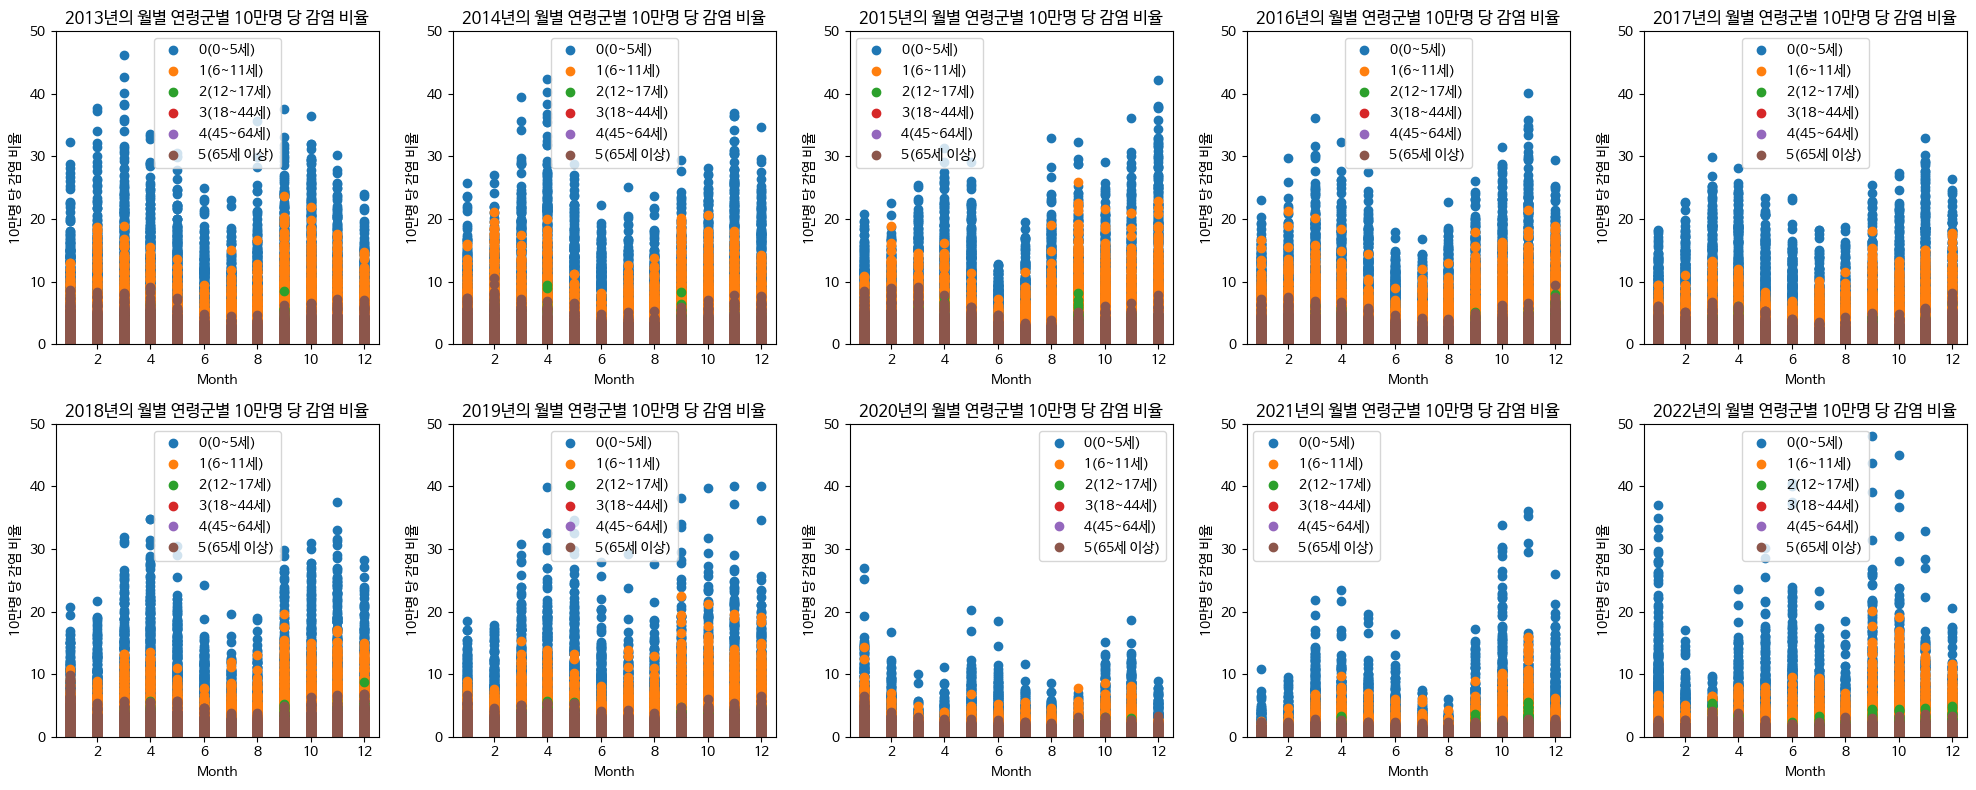

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, year in enumerate(range(2013, 2023)):
  row = i // 5
  col = i % 5
  ax = axs[row, col]

  year_data_as = merged_df_As[merged_df_As['연도'] == year]

  # 연령군을 카테고리 데이터로 변환하고, 각 카테고리에 고유한 숫자 할당
  year_data_as['연령군'] = pd.Categorical(year_data_as['연령군'])

  # 연령군별로 데이터를 그룹화하고 각 그룹에 대해 scatter 플롯 생성
  for age_group in year_data_as['연령군'].cat.categories:
    group_data = year_data_as[year_data_as['연령군'] == age_group]

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    ax.scatter(group_data['Year-Month'].dt.month, group_data['10만명 당 감염 비율'], label=label_str)

  ax.legend()
  ax.set_xlabel('Month')
  ax.set_ylabel('10만명 당 감염 비율')
  ax.set_title(f'{year}년의 월별 연령군별 10만명 당 감염 비율')
  # y축 범위 설정
  ax.set_ylim(0, 50)

plt.tight_layout()
plt.show()

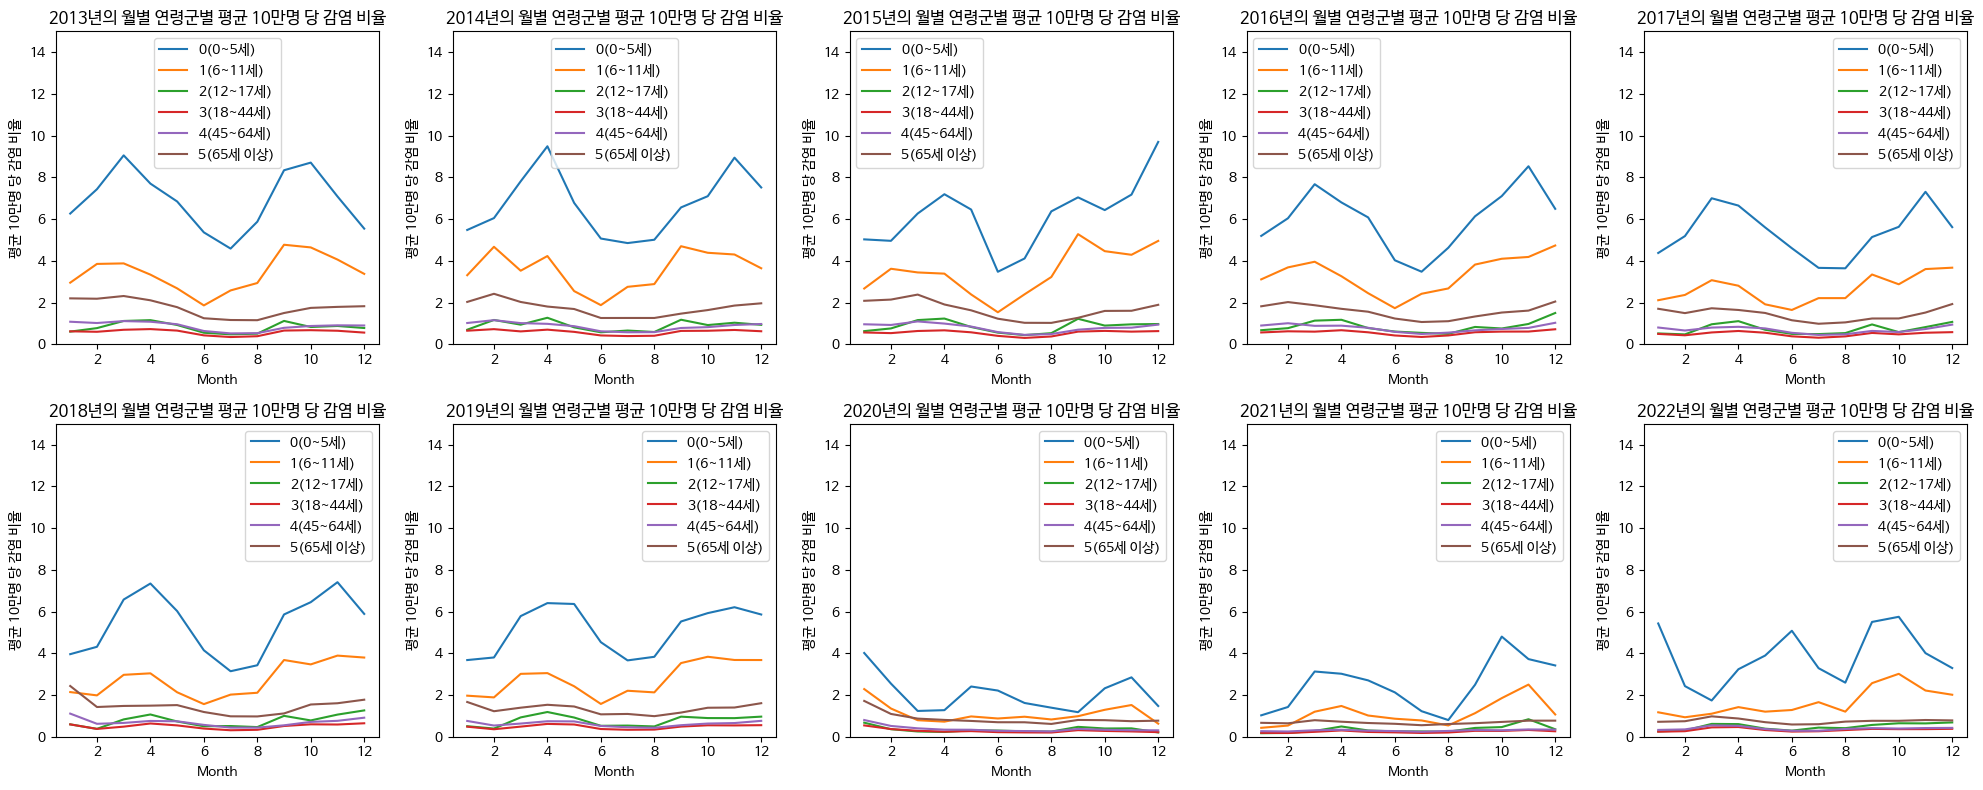

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# 연령군에 대한 설명을 담은 사전
age_group_dict = {
    0: '0~5세',
    1: '6~11세',
    2: '12~17세',
    3: '18~44세',
    4: '45~64세',
    5: '65세 이상'
}

for i, year in enumerate(range(2013, 2023)):
    row = i // 5
    col = i % 5
    ax = axs[row, col]

    year_data_as = merged_df_As[merged_df_As['연도'] == year]

    # 연령군을 카테고리 데이터로 변환
    year_data_as['연령군'] = pd.Categorical(year_data_as['연령군'])

    # 연도, 월, 연령군별로 그룹화하여 평균 계산
    avg_infection_rate = year_data_as.groupby([year_data_as['Year-Month'].dt.month, '연령군'])['10만명 당 감염 비율'].mean()

    for age_group in year_data_as['연령군'].cat.categories:
        # 연령군별 데이터 추출
        group_data = avg_infection_rate[:, age_group]

        # 레이블 설정
        label_str = f'{age_group}({age_group_dict[age_group]})'  # age_group_dict는 연령군에 대한 설명을 담은 사전

        ax.plot(group_data.index, group_data.values, label=label_str)

    ax.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('평균 10만명 당 감염 비율')
    ax.set_title(f'{year}년의 월별 연령군별 평균 10만명 당 감염 비율')
    # y축 범위 설정
    ax.set_ylim(0, 15)

plt.tight_layout()
plt.show()

# **아토피 데이터의 연도별, 연령별 분포 그래프**

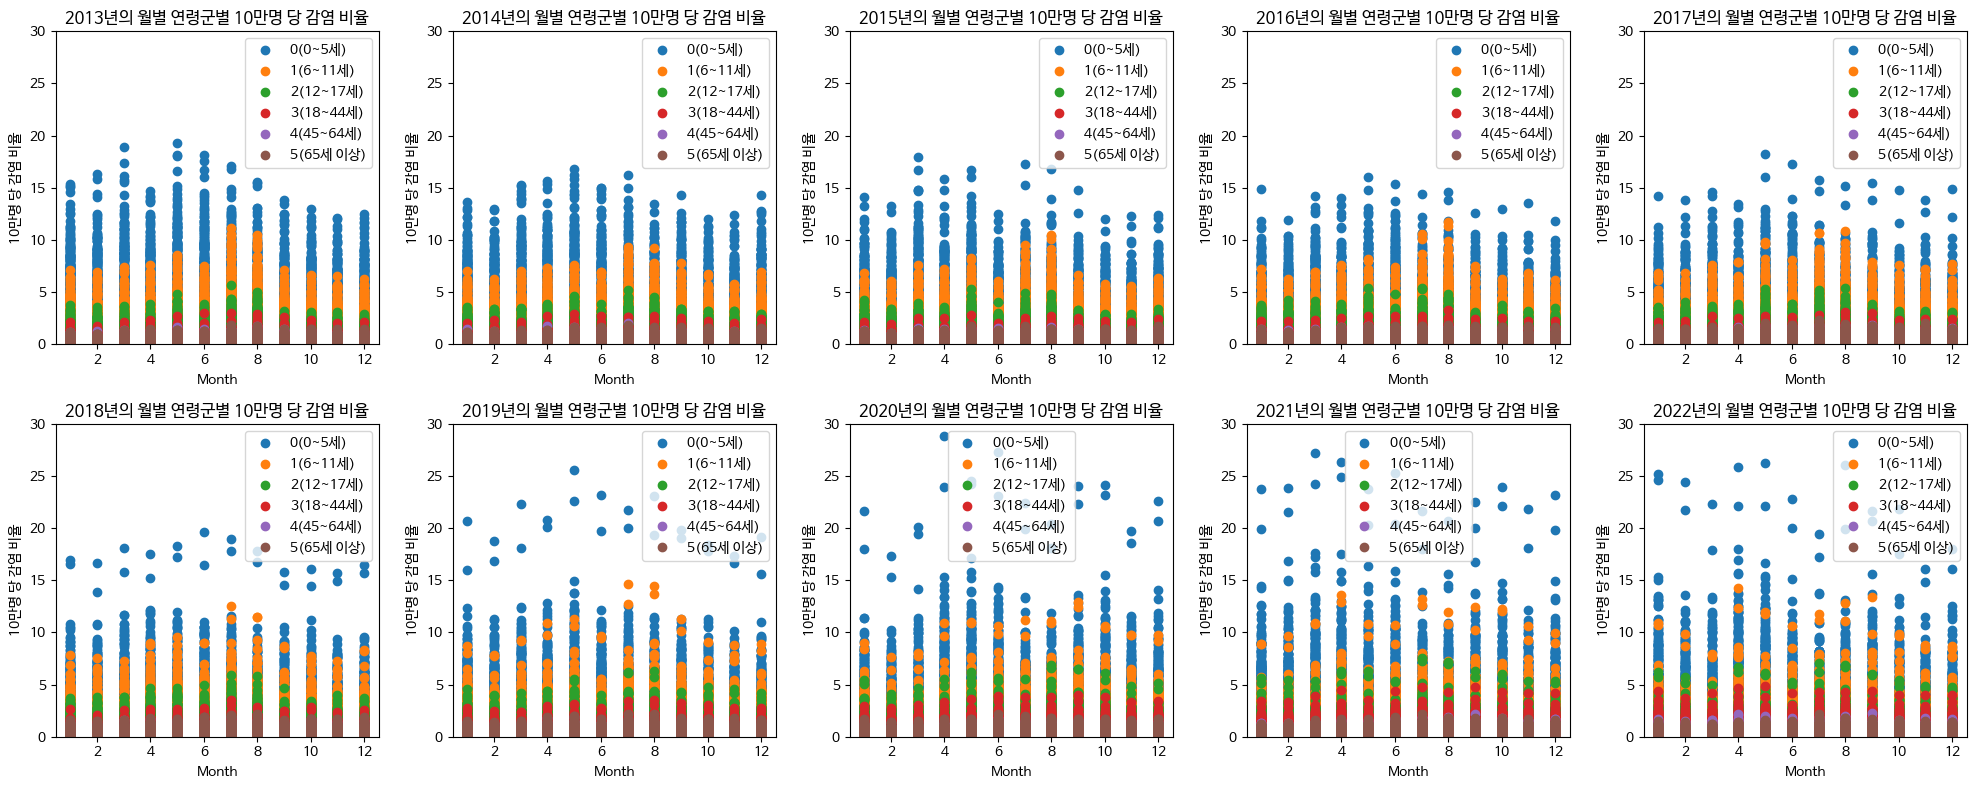

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, year in enumerate(range(2013, 2023)):
  row = i // 5
  col = i % 5
  ax = axs[row, col]

  year_data_at = merged_df_At[merged_df_At['연도'] == year]

  # 연령군을 카테고리 데이터로 변환하고, 각 카테고리에 고유한 숫자 할당
  year_data_at['연령군'] = pd.Categorical(year_data_at['연령군'])

  # 연령군별로 데이터를 그룹화하고 각 그룹에 대해 scatter 플롯 생성
  for age_group in year_data_at['연령군'].cat.categories:
    group_data = year_data_at[year_data_at['연령군'] == age_group]

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    ax.scatter(group_data['Year-Month'].dt.month, group_data['10만명 당 감염 비율'], label=label_str)

  ax.legend()
  ax.set_xlabel('Month')
  ax.set_ylabel('10만명 당 감염 비율')
  ax.set_title(f'{year}년의 월별 연령군별 10만명 당 감염 비율')

  # y축 범위 설정
  ax.set_ylim(0, 30)


plt.tight_layout()
plt.show()

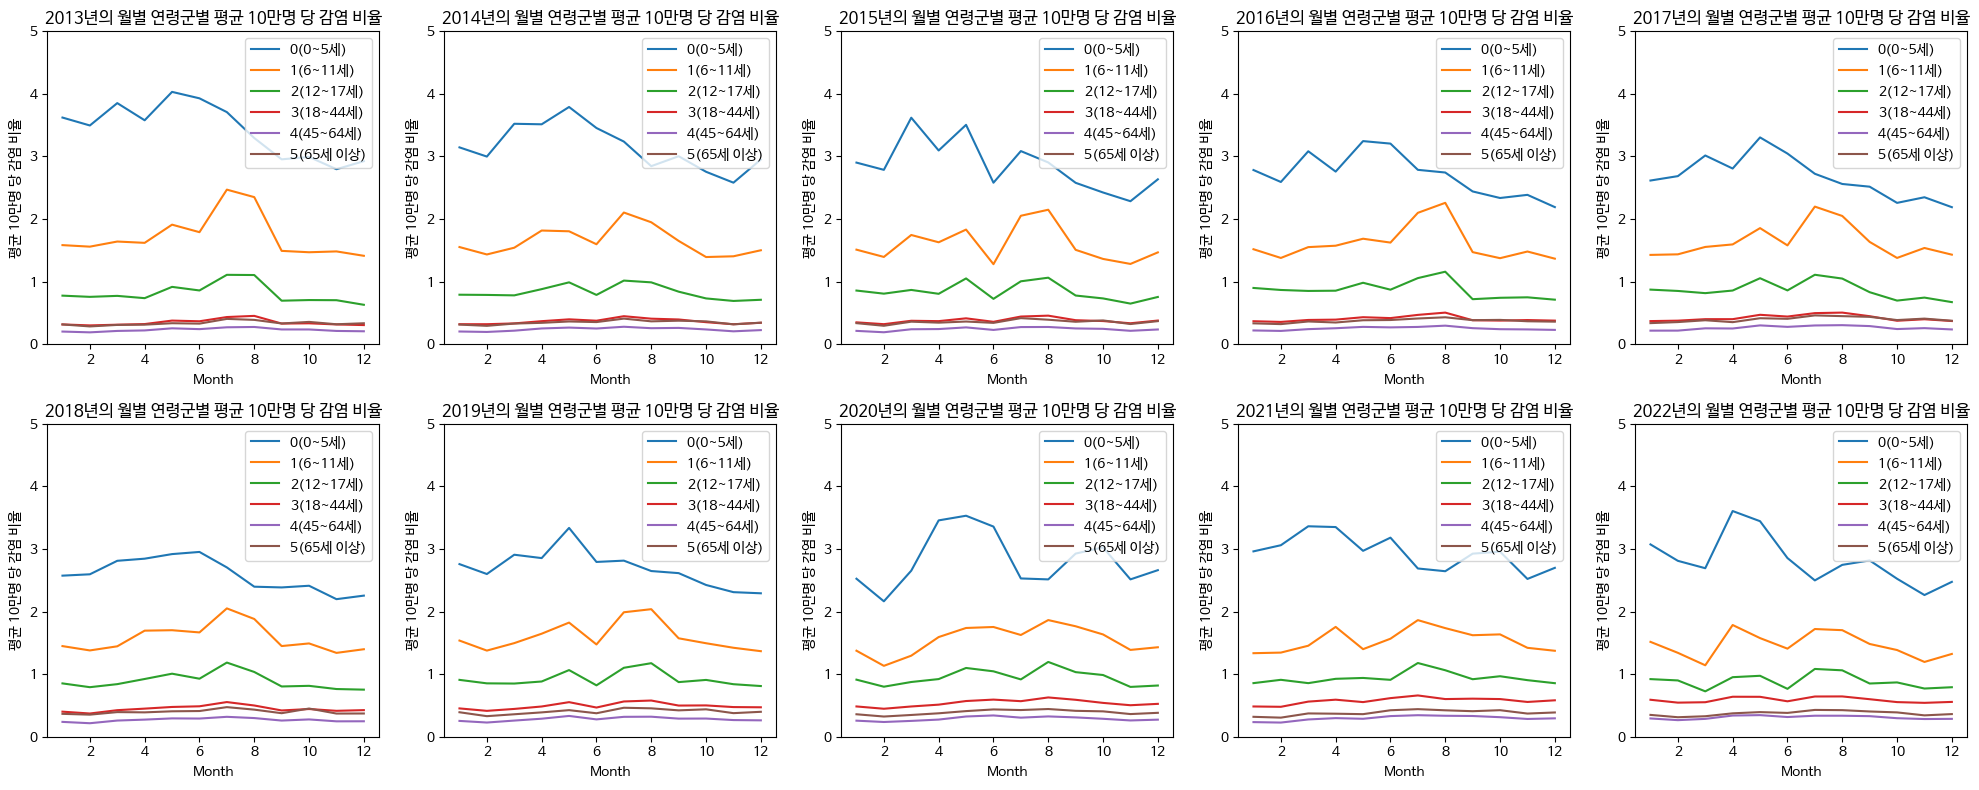

In [ ]:
# 2X5 그리드 생성
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# 연령군에 대한 설명을 담은 사전
age_group_dict = {
    0: '0~5세',
    1: '6~11세',
    2: '12~17세',
    3: '18~44세',
    4: '45~64세',
    5: '65세 이상'
}

for i, year in enumerate(range(2013, 2023)):
    row = i // 5
    col = i % 5
    ax = axs[row, col]

    year_data_at = merged_df_At[merged_df_At['연도'] == year]

    # 연령군을 카테고리 데이터로 변환
    year_data_at['연령군'] = pd.Categorical(year_data_at['연령군'])

    # 연도, 월, 연령군별로 그룹화하여 평균 계산
    avg_infection_rate = year_data_at.groupby([year_data_at['Year-Month'].dt.month, '연령군'])['10만명 당 감염 비율'].mean()

    for age_group in year_data_at['연령군'].cat.categories:
        # 연령군별 데이터 추출
        group_data = avg_infection_rate[:, age_group]

        # 레이블 설정
        label_str = f'{age_group}({age_group_dict[age_group]})'  # age_group_dict는 연령군에 대한 설명을 담은 사전

        ax.plot(group_data.index, group_data.values, label=label_str)

    ax.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('평균 10만명 당 감염 비율')
    ax.set_title(f'{year}년의 월별 연령군별 평균 10만명 당 감염 비율')
    # y축 범위 설정
    ax.set_ylim(0, 5)

plt.tight_layout()
plt.show()

# **비염데이터의 연령별 평균 시계열 그래프**

In [ ]:
#연도와 연령군으로 나누고, 평균을 구함
df_year_R = merged_df_R.groupby(['연도','연령군'])[['10만명 당 감염 비율']].mean()

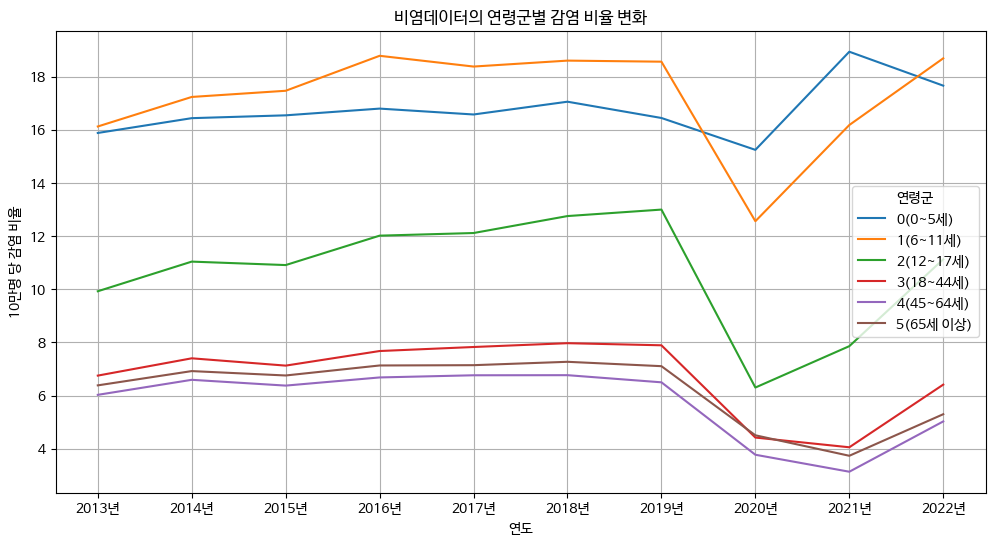

In [ ]:
# 연령군별로 데이터 분리
age_groups = df_year_R.index.get_level_values('연령군').unique()

# 그래프 생성
plt.figure(figsize=(12, 6))

for age_group in age_groups:
    # 특정 연령군에 대한 데이터 추출
    data = df_year_R.xs(age_group, level='연령군')

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    plt.plot(data.index, data['10만명 당 감염 비율'], label=label_str)

# x축 눈금 레이블 설정
plt.xticks(data.index, [f"{year}년" for year in data.index])

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('10만명 당 감염 비율')
plt.title('비염데이터의 연령군별 감염 비율 변화')
plt.legend(title='연령군')
plt.grid(True)

# 그래프 표시
plt.show()

# **천식데이터의 연령별 평균 시계열 그래프**

In [ ]:
#연도와 연령군으로 나누고, 평균을 구함
df_year_As = merged_df_As.groupby(['연도','연령군'])[['10만명 당 감염 비율']].mean()

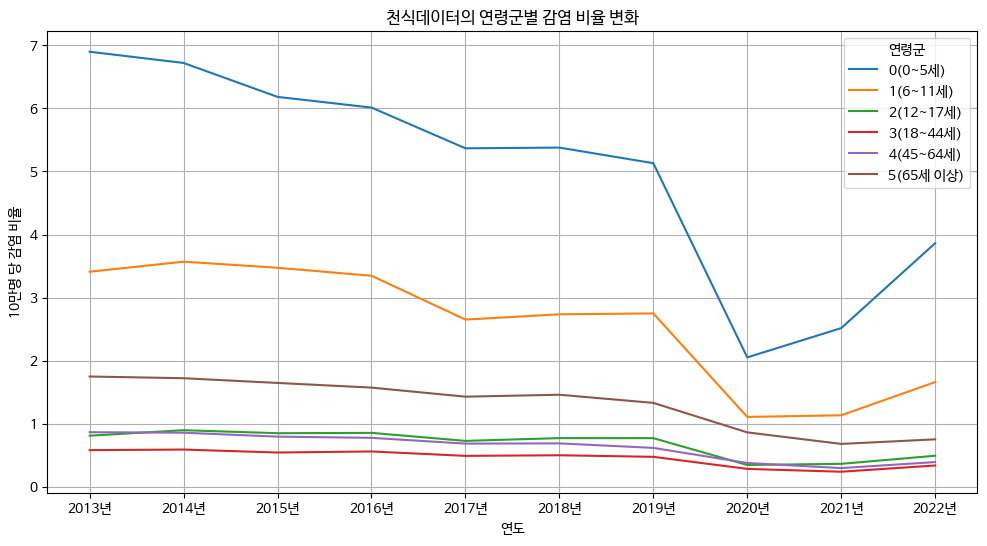

In [ ]:
# 연령군별로 데이터 분리
age_groups = df_year_As.index.get_level_values('연령군').unique()

# 그래프 생성
plt.figure(figsize=(12, 6))

for age_group in age_groups:
    # 특정 연령군에 대한 데이터 추출
    data = df_year_As.xs(age_group, level='연령군')

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    plt.plot(data.index, data['10만명 당 감염 비율'], label=label_str)

# x축 눈금 레이블 설정
plt.xticks(data.index, [f"{year}년" for year in data.index])

# 그래프 설정
plt.xlabel('연도')
plt.ylabel('10만명 당 감염 비율')
plt.title('천식데이터의 연령군별 감염 비율 변화')
plt.legend(title='연령군')
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
df_year_At = merged_df_At.groupby(['연도','연령군'])[['10만명 당 감염 비율']].mean()

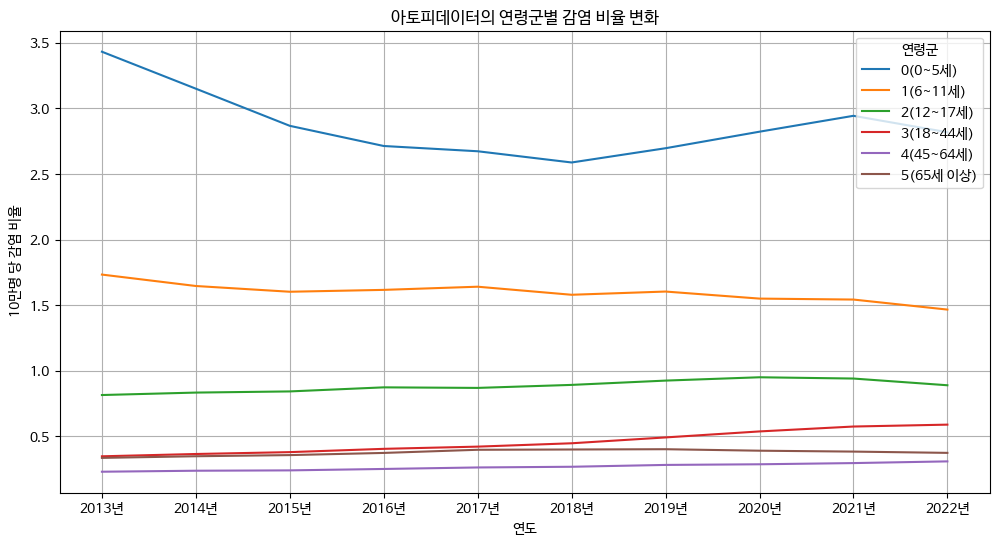

In [ ]:
# 연령군별로 데이터 분리
age_groups = df_year_At.index.get_level_values('연령군').unique()

# 그래프 생성
plt.figure(figsize=(12, 6))

for age_group in age_groups:
    # 특정 연령군에 대한 데이터 추출
    data = df_year_At.xs(age_group, level='연령군')

    #추가하고자 하는 내용
    if age_group == 0:
      label_str = '0(0~5세)'
    elif age_group == 1:
      label_str = '1(6~11세)'
    elif age_group == 2:
      label_str = '2(12~17세)'
    elif age_group == 3:
      label_str = '3(18~44세)'
    elif age_group == 4:
      label_str = '4(45~64세)'
    else:
        label_str = '5(65세 이상)'

    plt.plot(data.index, data['10만명 당 감염 비율'], label=label_str)

# x축 눈금 레이블 설정
plt.xticks(data.index, [f"{year}년" for year in data.index])

# 그래프 설정
plt.xlabel('연도')
plt.ylabel(' 10만명 당 감염 비율')
plt.title('아토피데이터의 연령군별 감염 비율 변화')
plt.legend(title='연령군')
plt.grid(True)

# 그래프 표시
plt.show()